In [10]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
#import mpld3
#mpld3.enable_notebook()

In [11]:
periodo = 125 
imp = signal.unit_impulse(periodo)
ordenFiltro = 4
wc = 6/periodo #0.038
b, a = signal.butter(ordenFiltro, wc)
impulseResponse = signal.lfilter(b, a, imp)


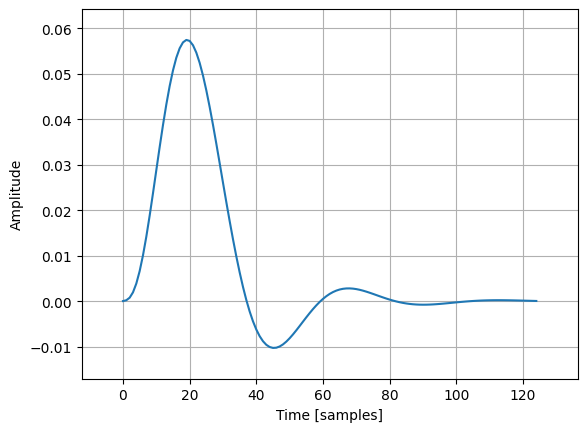

In [12]:
plt.plot(np.arange(0, len(impulseResponse)), impulseResponse)
plt.margins(0.1, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [13]:
import numpy as np
import struct


# # Replace 'directory' with the path to your binary file
# #directory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20221116-073/nodo_94b97ed9819c/20221116-073-0.dat'

# directory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20230719-015/nodo_34ab958660d0/20230719-015-0.dat'

# # Define the data type and width for your binary file
# dtype = np.float64  # Data type of the values in the second column
# #Las muestras se guardan de a 14 bytes
# BYTES_MUESTRA = 14     # Width of each value in bytes (assuming float64)
# #Los primeros 23 bytes corresponden al encabezado y se tiran
# BYTES_ENCABEZADO = 23

# # Initialize an empty list to store the values from the second column
# second_column_values = []

# # Open the binary file in binary mode
# with open(directory, 'rb') as binary_file:
#     binary_file.read(BYTES_ENCABEZADO) #tira los datos del encabezado
#     muestra = binary_file.read(BYTES_MUESTRA)
    
#     while True:
#         # Break the loop if no more data is available
#         if not muestra or len(muestra)!=BYTES_MUESTRA:
#             break
        
#         # Unpack the binary data into a float using struct.unpack
#         values = struct.unpack('7h', muestra)

#         # Extract the second element from the array
#         value = values[0]
        
#         # Append the value to the list
#         second_column_values.append(value)
#         muestra = binary_file.read(BYTES_MUESTRA)
        
#     binary_file.close()

# # Convert the list to a NumPy array
# nodo_34ab958660d0 = np.array(second_column_values)

anchoVentana=2000#len(nodo_34ab958660d0)

# nodo_34ab958660d0 = (nodo_34ab958660d0 - np.mean(nodo_34ab958660d0))/16384
# nodo_34ab958660d0 = nodo_34ab958660d0 * 9.806
# nodo_34ab958660d0Cortado = nodo_34ab958660d0[:anchoVentana]

# corrNodo_34ab958660d0 = signal.correlate(nodo_34ab958660d0Cortado, impulseResponse)
# lagsNodo_34ab958660d0 = signal.correlation_lags(len(nodo_34ab958660d0Cortado), len(impulseResponse))
# corrNodo_34ab958660d0 /= np.max(corrNodo_34ab958660d0)

# localMaxsNodo_34ab958660d0, _ = signal.find_peaks(corrNodo_34ab958660d0, height=0.8)
# localMaxsDistNodo_34ab958660d0 = np.diff(localMaxsNodo_34ab958660d0)

In [14]:
# Replace 'directory' with the path to your binary file
directory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20221116-073/nodo_94b97eda9150/20221116-073-0.dat'

#directory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20230719-015/nodo_94b97eda9150/20230719-015-0.dat'

# Define the data type and width for your binary file
dtype = np.float64  # Data type of the values in the second column
#Las muestras se guardan de a 14 bytes
BYTES_MUESTRA = 14     # Width of each value in bytes (assuming float64)
#Los primeros 23 bytes corresponden al encabezado y se tiran
BYTES_ENCABEZADO = 23

# Initialize an empty list to store the values from the second column
second_column_values = []

# Open the binary file in binary mode
with open(directory, 'rb') as binary_file:
    binary_file.read(BYTES_ENCABEZADO) #tira los datos del encabezado
    muestra = binary_file.read(BYTES_MUESTRA)
    
    while True:
        # Break the loop if no more data is available
        if not muestra or len(muestra)!=BYTES_MUESTRA:
            break
        
        # Unpack the binary data into a float using struct.unpack
        values = struct.unpack('7h', muestra)

        # Extract the second element from the array
        value = values[0]
        
        # Append the value to the list
        second_column_values.append(value)
        muestra = binary_file.read(BYTES_MUESTRA)

    binary_file.close()

# Convert the list to a NumPy array
nodo_94b97eda9150 = np.array(second_column_values)*-1

nodo_94b97eda9150 = (nodo_94b97eda9150 - np.mean(nodo_94b97eda9150))/16384
nodo_94b97eda9150 = nodo_94b97eda9150 * 9.806
nodo_94b97eda9150Cortado = nodo_94b97eda9150[:anchoVentana]

corrNodo_94b97eda9150= signal.correlate(nodo_94b97eda9150Cortado, impulseResponse)
lagsNodo_94b97eda9150 = signal.correlation_lags(len(nodo_94b97eda9150Cortado), len(impulseResponse))
corrNodo_94b97eda9150 /= np.max(corrNodo_94b97eda9150)

localMaxsNodo_94b97eda9150, _ = signal.find_peaks(corrNodo_94b97eda9150, height=0.8)
localMaxsDistNodo_94b97eda9150 = np.diff(localMaxsNodo_94b97eda9150)

In [15]:


'''
# Replace 'directory' with the path to your binary file
directory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20221116-073/nodo_94b97eda2f1c/20221116-073-0.dat'

#directory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20230719-015/nodo_94b97eda9150/20230719-015-0.dat'

# Define the data type and width for your binary file
dtype = np.float64  # Data type of the values in the second column
#Las muestras se guardan de a 14 bytes
BYTES_MUESTRA = 14     # Width of each value in bytes (assuming float64)
#Los primeros 23 bytes corresponden al encabezado y se tiran
BYTES_ENCABEZADO = 23

# Initialize an empty list to store the values from the second column
second_column_values = []

# Open the binary file in binary mode
with open(directory, 'rb') as binary_file:
    binary_file.read(BYTES_ENCABEZADO) #tira los datos del encabezado
    muestra = binary_file.read(BYTES_MUESTRA)
    
    while True:
        # Break the loop if no more data is available
        if not muestra or len(muestra)!=BYTES_MUESTRA:
            break
        
        # Unpack the binary data into a float using struct.unpack
        values = struct.unpack('7h', muestra)

        # Extract the second element from the array
        value = values[0]
        
        # Append the value to the list
        second_column_values.append(value)
        muestra = binary_file.read(BYTES_MUESTRA)

    binary_file.close()

# Convert the list to a NumPy array
nodo_94b97eda2f1c = np.array(second_column_values)*-1

nodo_94b97eda2f1c = (nodo_94b97eda2f1c - np.mean(nodo_94b97eda2f1c))/16384
nodo_94b97eda2f1c = nodo_94b97eda2f1c * 9.806
nodo_94b97eda2f1cCortado = nodo_94b97eda2f1c[:anchoVentana]

corrNodo_94b97eda2f1c= signal.correlate(nodo_94b97eda2f1cCortado, impulseResponse)
lagsNodo_94b97eda2f1c = signal.correlation_lags(len(nodo_94b97eda2f1cCortado), len(impulseResponse))
corrNodo_94b97eda2f1c /= np.max(corrNodo_94b97eda2f1c)

localMaxsNodo_94b97eda2f1c, _ = signal.find_peaks(corrNodo_94b97eda2f1c, height=0.8)
localMaxsDistNodo_94b97eda2f1c = np.diff(localMaxsNodo_94b97eda2f1c)
'''

"\n# Replace 'directory' with the path to your binary file\ndirectory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20221116-073/nodo_94b97eda2f1c/20221116-073-0.dat'\n\n#directory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20230719-015/nodo_94b97eda9150/20230719-015-0.dat'\n\n# Define the data type and width for your binary file\ndtype = np.float64  # Data type of the values in the second column\n#Las muestras se guardan de a 14 bytes\nBYTES_MUESTRA = 14     # Width of each value in bytes (assuming float64)\n#Los primeros 23 bytes corresponden al encabezado y se tiran\nBYTES_ENCABEZADO = 23\n\n# Initialize an empty list to store the values from the second column\nsecond_column_values = []\n\n# Open the binary file in binary mode\nwith open(directory, 'rb') as binary_file:\n    binary_file.read(BYTES_ENCABEZADO) #tira los datos del encabezado\n    muestra = binary_file.read(BYTES_MUESTRA)\n    \n    while True:\n        #

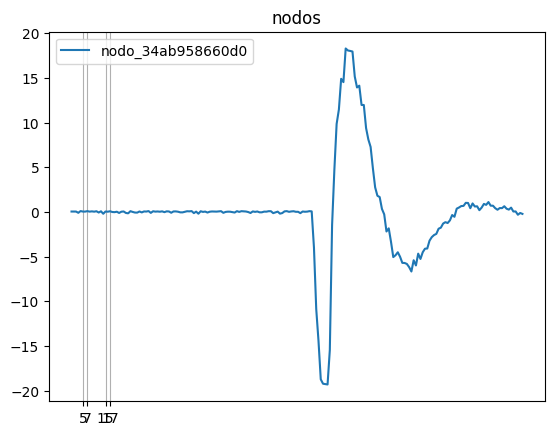

In [16]:

fig2, ax = plt.subplots()
limiteInf = 900
limiteSup = 1100
#ax.plot(nodo_34ab958660d0[limiteInf:limiteSup])
ax.set_title('nodos')

ax.plot(nodo_94b97eda9150[limiteInf:limiteSup])
ax.legend(['nodo_34ab958660d0','nodo_94b97eda9150'])
ax.set_xticks([5, 7, 15, 17], minor=False)
ax.xaxis.grid(True, which='major')


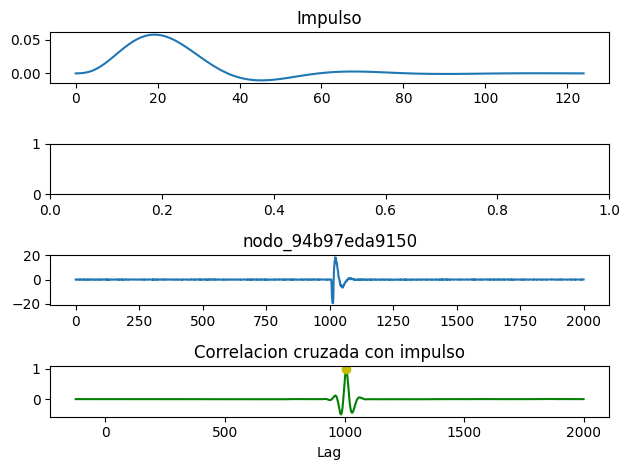

In [17]:
fig3, (ax_imp, ax_60d0, ax_9150, ax_corr) = plt.subplots(4, 1)
ax_imp.plot(impulseResponse)
ax_imp.set_title('Impulso')

#ax_60d0.plot(nodo_34ab958660d0Cortado)
#ax_60d0.set_title('nodo_34ab958660d0')

ax_9150.plot(nodo_94b97eda9150Cortado)
ax_9150.set_title('nodo_94b97eda9150')


#ax_corr.plot(lagsNodo_34ab958660d0, corrNodo_34ab958660d0, 'b-')
#ax_corr.plot(lagsNodo_34ab958660d0[localMaxsNodo_34ab958660d0], corrNodo_34ab958660d0[localMaxsNodo_34ab958660d0], 'ro')

ax_corr.plot(lagsNodo_94b97eda9150, corrNodo_94b97eda9150, 'g-')
ax_corr.plot(lagsNodo_94b97eda9150[localMaxsNodo_94b97eda9150], corrNodo_94b97eda9150[localMaxsNodo_94b97eda9150], 'yo')


#ax_corr.plot(lagsNodo_94b97eda2f1c, corrNodo_94b97eda2f1c, 'k-')
#ax_corr.plot(lagsNodo_94b97eda2f1c[localMaxsNodo_94b97eda2f1c], corrNodo_94b97eda2f1c[localMaxsNodo_94b97eda2f1c], 'wo')

ax_corr.set_title('Correlacion cruzada con impulso')
ax_corr.set_xlabel('Lag')

fig3.tight_layout()
#mpld3.display()
plt.show()

In [18]:
if len(localMaxsNodo_34ab958660d0) == len(localMaxsNodo_94b97eda9150) :
    deltaIndex = localMaxsNodo_34ab958660d0 - localMaxsNodo_94b97eda9150
    np.append(deltaIndex, localMaxsNodo_34ab958660d0 - localMaxsNodo_94b97eda2f1c)
    np.append(deltaIndex, localMaxsNodo_94b97eda9150 - localMaxsNodo_94b97eda2f1c)
    fig3, axHist = plt.subplots(figsize =(10, 7))
    axHist.hist(deltaIndex)
    plt.show()

NameError: name 'localMaxsNodo_34ab958660d0' is not defined